In [2]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

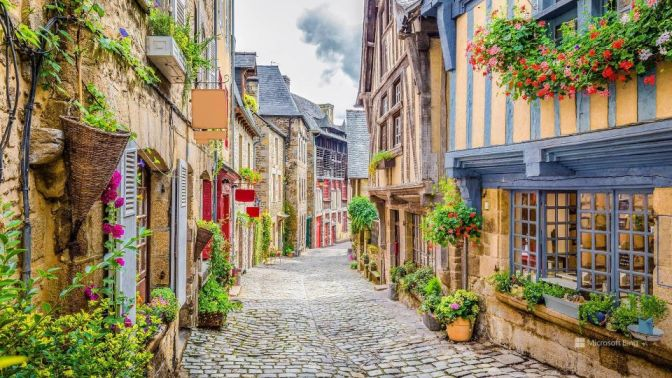

-1

In [3]:
#Latihan 1

#Ubah code program sebelumnya lalu ubah translasi citra sehingga menjadi tidak terpotong
img = cv2.imread('/content/input.jpg')
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,0], [0,1,0] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
cv2_imshow(img_translation)
cv2.waitKey()

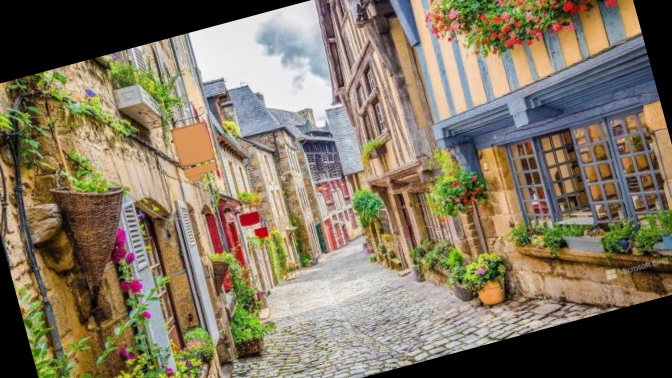

-1

In [4]:
#Latihan 2

#Ubah code program sebelumnya dengan memperkecil ukuran citra rotasi menjadi setengahnya
img = cv2.imread('/content/input.jpg')
num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 15, 1)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
cv2_imshow(img_rotation)
cv2.waitKey()

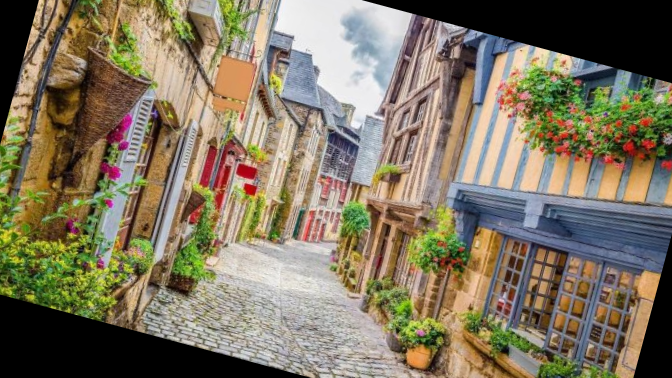

-1

In [5]:
#Latihan 3

#Ubah latihan 2, lalu coba ubah rotasi gambar menjadi searah jarum jam
img = cv2.imread('/content/input.jpg')
num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), -15, 1)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
cv2_imshow(img_rotation)
cv2.waitKey()

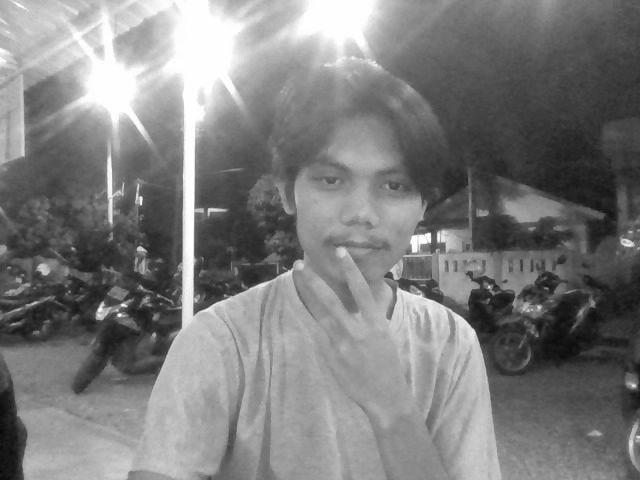

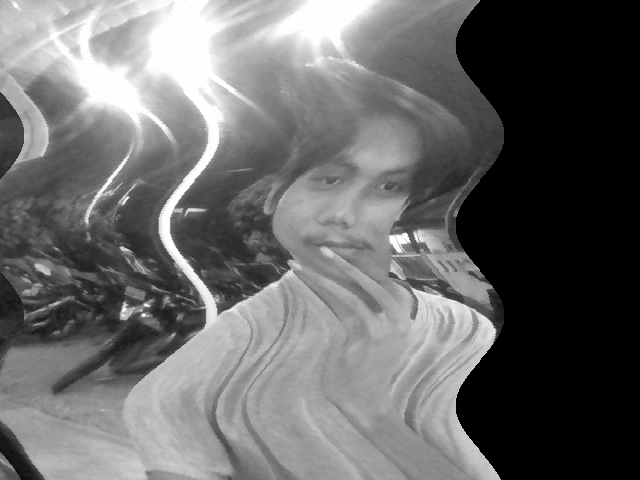

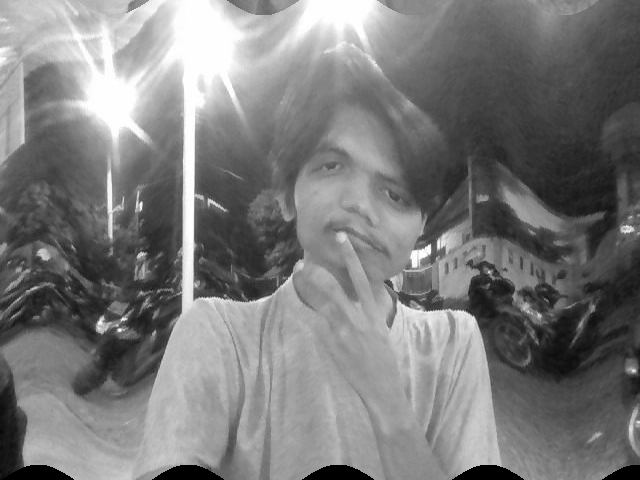

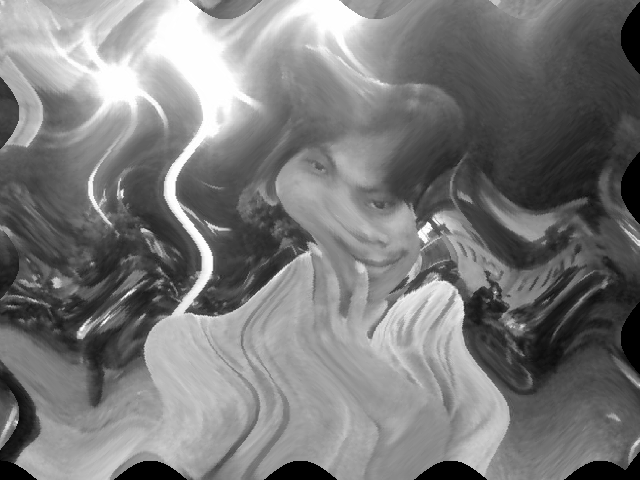

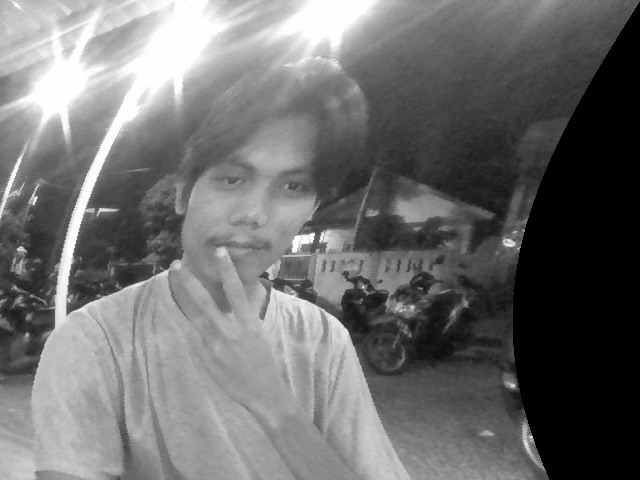

-1

In [8]:
#Latihan 4

#Ubah program image warping di atas sehingga image yang digunakan adalah foto selfie sendiri
img = cv2.imread('/content/photo.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

#####################
# Vertical wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
        offset_y = 0
        if j+offset_x < rows:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2_imshow(img)
cv2_imshow(img_output)

#####################
# Horizontal wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        if i+offset_y < rows:
            img_output[i,j] = img[(i+offset_y)%rows,j]
        else:
            img_output[i,j] = 0

cv2_imshow(img_output)

#####################
# Both horizontal and vertical

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150))
        if i+offset_y < rows and j+offset_x < cols:
            img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2_imshow(img_output)

#####################
# Concave effectimg_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2*cols)))
        offset_y = 0
        if j+offset_x < cols:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2_imshow(img_output)
cv2.waitKey()

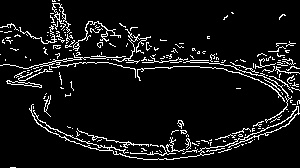

In [10]:
#Latihan 5

#Silakan bereksperimen dengan gambar lainnya (bebas) untuk melakukan deteksi tepi menggunakan Canny
img = cv2.imread("/content/images.jpg", 0)
cv2.imwrite("canny.jpg", cv2.Canny(img, 200, 300)) # Canny in one line!
cv2_imshow(cv2.imread("canny.jpg"))
cv2.waitKey()
cv2.destroyAllWindows()

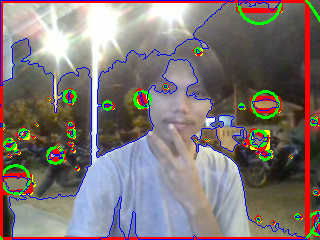

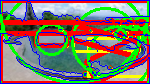

In [12]:
#Latihan 6

#Gunakan code di atas dan lakukan eksperimen pada gambar pada code warping
img = cv2.pyrDown(cv2.imread("/content/photo.jpg", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Lalu untuk setiap kontur, kita dapat menemukan bounding box, minimum enclosing rectangle, 
#dan minimum enclosing circle
for c in contours:
    # find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 255), 2)
    
    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    # normalize coordinates to integers
    box = np.int0(box)
    # draw contours
    cv2.drawContours(img, [box], 0, (0,0, 255), 3)
    
    # calculate center and radius of minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x), int(y))
    radius = int(radius)
    # draw the circle
    img = cv2.circle(img, center, radius, (0, 255, 0), 2)
    
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

#Lalu coba eksperimen untuk gambar lainnya (bebas)
img = cv2.pyrDown(cv2.imread("/content/images.jpg", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Lalu untuk setiap kontur, kita dapat menemukan bounding box, minimum enclosing rectangle, 
#dan minimum enclosing circle
for c in contours:
    # find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 255), 2)
    
    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    # normalize coordinates to integers
    box = np.int0(box)
    # draw contours
    cv2.drawContours(img, [box], 0, (0,0, 255), 3)
    
    # calculate center and radius of minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x), int(y))
    radius = int(radius)
    # draw the circle
    img = cv2.circle(img, center, radius, (0, 255, 0), 2)
    
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()